This should have happened before:
```
muniphot *.fit
munimatch --verbose frame001.pht frame*.pht
munifind -a 2 found.txt match*
```

In [35]:
# CONFIG

basedir = './inputfiles/WWCrA/'

In [43]:
# IMPORT

import pandas as pd
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt
import seaborn as sns

from astropy import wcs
from astropy.io import fits
from astropy.coordinates import SkyCoord


In [52]:
def setup_wcs(coord):
    w = wcs.WCS(naxis=2)

    # Set up an "Airy's zenithal" projection
    # Vector properties may be set with Python lists, or Numpy arrays
    w.wcs.crpix = [1365/2.0, 1365/2.0]
    w.wcs.cdelt = numpy.array([-0.000572222222222, 0.000572222222222])
    print("ra/dec", coord.ra.degree, coord.dec.degree)
    w.wcs.crval = [coord.ra.degree, coord.dec.degree]
    w.wcs.ctype = ["RA---AIR", "DEC--AIR"]
    return w
    
def pixel_to_radec(wcs_config, xpix, ypix):
    pixcrd = numpy.array([[xpix, ypix]], numpy.float_)
    return wcs_config.wcs_pix2world(pixcrd, 1)

def star_to_radec():
    
# coords of center of frame of first image
c = SkyCoord(18.0936111, -43.8325000, unit="deg")
wcs_config = setup_wcs(c)
result = pixel_to_radec(wcs_config, 1365/2.0, 1365/2.0)
print(result)

ra/dec 18.0936111 -43.8325
[[ 18.0936111 -43.8325   ]]


In [37]:
# Set the WCS information manually by setting properties of the WCS
# object.

# Create a new WCS object.  The number of axes must be set
# from the start
w = wcs.WCS(naxis=2)

# Set up an "Airy's zenithal" projection
# Vector properties may be set with Python lists, or Numpy arrays
w.wcs.crpix = [1365/2.0, 1365/2.0]
w.wcs.cdelt = numpy.array([-0.000572222222222, 0.000572222222222])
w.wcs.crval = [18.0936111, -43.8325000]
w.wcs.ctype = ["RA---AIR", "DEC--AIR"]

# Some pixel coordinates of interest.
pixcrd = numpy.array([[0, 0], [1365/2.0, 1365/2.0], [45, 98]], numpy.float_)

# Convert pixel coordinates to world coordinates
world = w.wcs_pix2world(pixcrd, 1)
print(world)

# Convert the same coordinates back to pixel coordinates.
pixcrd2 = w.wcs_world2pix(world, 1)
print(pixcrd2)

# These should be the same as the original pixel coordinates, modulo
# some floating-point error.
assert numpy.max(numpy.abs(pixcrd - pixcrd2)) < 1e-6

# Now, write out the WCS object as a FITS header
header = w.to_header()

# header is an astropy.io.fits.Header object.  We can use it to create a new
# PrimaryHDU and write it to a file.
hdu = fits.PrimaryHDU(header=header)
# Save to FITS file
# hdu.writeto('test.fits')

[[ 18.63856748 -44.22175161]
 [ 18.0936111  -43.8325    ]
 [ 18.60215434 -44.16583993]]
[[ -4.76461537e-10  -4.68389771e-10]
 [  6.82500000e+02   6.82500000e+02]
 [  4.50000000e+01   9.80000000e+01]]


In [40]:

# INDEX MEAN_MAG STDEV GOODPOINTS
def read_munifind(filename):
    df = pd.read_csv(filename, skiprows=[1], sep=' ')
    df.rename(columns = {'INDEX':'STAR'}, inplace = True)
    print("max goodpoints:", df['GOODPOINTS'].max())
    print("min stdev:", df['STDEV'].min())
    #df.iloc[40]
    print(df.sort_values('STDEV').head())
    return df

df = read_munifind(basedir+'found.txt')


max goodpoints: 166
min stdev: 0.00595
    STAR  MEAN_MAG    STDEV  GOODPOINTS
40    49   1.78410  0.00595         166
27    36   1.65304  0.00620         166
51    61   1.97571  0.00661         164
19    26   1.53687  0.00664         166
6      7   0.55005  0.00689         166


index 2675 is <pandas.core.indexing._iLocIndexer object at 0x7faa5d75a860>


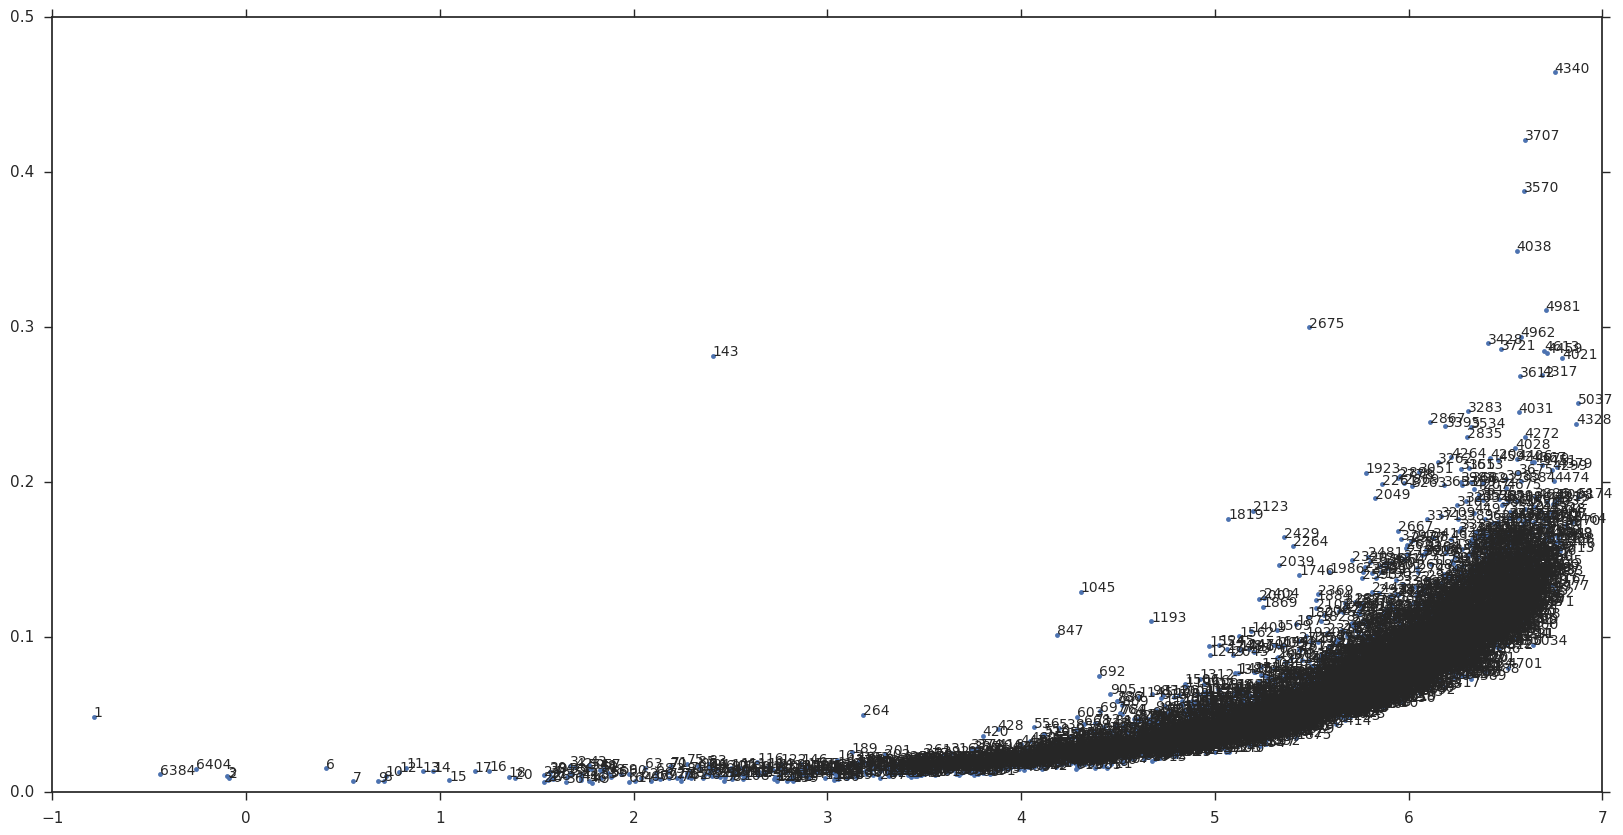

In [41]:
%matplotlib inline
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
x = df['MEAN_MAG']
y = df['STDEV']
z = df['GOODPOINTS']
realx = x
realy = y
ax.plot(realx, realy, '.')
for i, d in enumerate(x):
    ax.annotate(df['STAR'][i], (realx[i],realy[i]))
print('index 2675 is', df.iloc(2675))


In [29]:
def getBestComparisonStars():
    result = []
    # TODO: filter all stars which have not the maximum of GOODPOINTS
    lowest_stdev = df.sort_values('STDEV')
#    print(lowest_stdev.describe())
    for entry in range(0,10):
        #print(lowest_stdev.iloc[[entry]].index[0])
        #print(lowest_stdev.iloc[[entry]].values[0])
        print(lowest_stdev.iloc[[entry]])
        result.append((lowest_stdev.iloc[[entry]].index[0], lowest_stdev.iloc[[entry]]['GOODPOINTS']))
    return result
        
    
bestcomps = getBestComparisonStars()
#print(bestcomps)
    
    

    STAR  MEAN_MAG    STDEV  GOODPOINTS
40    49    1.7841  0.00595         166
    STAR  MEAN_MAG   STDEV  GOODPOINTS
27    36   1.65304  0.0062         166
    STAR  MEAN_MAG    STDEV  GOODPOINTS
51    61   1.97571  0.00661         164
    STAR  MEAN_MAG    STDEV  GOODPOINTS
19    26   1.53687  0.00664         166
   STAR  MEAN_MAG    STDEV  GOODPOINTS
6     7   0.55005  0.00689         166
    STAR  MEAN_MAG    STDEV  GOODPOINTS
52    64   2.00887  0.00692         162
     STAR  MEAN_MAG    STDEV  GOODPOINTS
119   139   2.82141  0.00693         166
    STAR  MEAN_MAG    STDEV  GOODPOINTS
37    46    1.7702  0.00694         166
   STAR  MEAN_MAG    STDEV  GOODPOINTS
7     9   0.68259  0.00709         166
    STAR  MEAN_MAG    STDEV  GOODPOINTS
85    98   2.46659  0.00714         166


In [30]:
print(df.iloc(143))

In [31]:
import subprocess
# munilist -a 2 --object 143 -v 143 -c 40 143.txt match*.pht

def write_lightcurve_and_pos(checkstar, star_list, aperture, lightcurve_dir):
    !mkdir {lightcurve_dir}
    for star in star_list:
        #import os
        #print(os.environ)
        !munilist -a {str(aperture)} --object {str(star)} -v {str(star)} -c {str(checkstar)} {lightcurve_dir + str(star) + ".txt"} {basedir+'match*.pht'}
        !munilist -a {str(aperture)} --track-list {str(star)} -v {str(star)} {lightcurve_dir + "pos_" + str(star) + ".txt"} {basedir+'match*.pht'}

star_list = (143,264,2675,1045,847,1193)
lightcurve_dir = basedir + "outstars/"
write_lightcurve_and_pos(49, star_list, 2, lightcurve_dir)

munilist (cmunipack) version 2.1.14

./inputfiles/WWCrA/match001.pht
./inputfiles/WWCrA/match002.pht
./inputfiles/WWCrA/match003.pht
./inputfiles/WWCrA/match004.pht
./inputfiles/WWCrA/match005.pht
./inputfiles/WWCrA/match006.pht
./inputfiles/WWCrA/match007.pht
./inputfiles/WWCrA/match008.pht
./inputfiles/WWCrA/match009.pht
./inputfiles/WWCrA/match010.pht
./inputfiles/WWCrA/match011.pht
./inputfiles/WWCrA/match012.pht
./inputfiles/WWCrA/match013.pht
./inputfiles/WWCrA/match014.pht
./inputfiles/WWCrA/match015.pht
./inputfiles/WWCrA/match016.pht
./inputfiles/WWCrA/match017.pht
./inputfiles/WWCrA/match018.pht
./inputfiles/WWCrA/match019.pht
./inputfiles/WWCrA/match020.pht
./inputfiles/WWCrA/match021.pht
./inputfiles/WWCrA/match022.pht
./inputfiles/WWCrA/match023.pht
./inputfiles/WWCrA/match024.pht
./inputfiles/WWCrA/match025.pht
./inputfiles/WWCrA/match026.pht
./inputfiles/WWCrA/match027.pht
./inputfiles/WWCrA/match028.pht
./inputfiles/WWCrA/match029.pht
./inputfiles/WWCrA/match030.pht
./i

In [32]:
df2 = pd.read_csv(lightcurve_dir + '2675.txt', skiprows=[1], sep=' ')
df2 = df2[df2['V-C'] < 99]
print(df2['V-C'].std())
print(df2.head())
print(df2.describe())

0.306597993204
             JD      V-C       s1         V       s2         C       s3
0  2.457631e+06  4.07943  0.10845  17.40188  0.10836  13.32245  0.00428
1  2.457631e+06  4.06485  0.10513  17.39311  0.10504  13.32826  0.00434
2  2.457631e+06  4.09793  0.11121  17.41780  0.11113  13.31986  0.00428
3  2.457631e+06  4.00352  0.10916  17.35151  0.10906  13.34799  0.00448
4  2.457631e+06  4.09168  0.11451  17.46770  0.11442  13.37602  0.00446
                 JD         V-C          s1           V          s2  \
count  1.620000e+02  162.000000  162.000000  162.000000  162.000000   
mean   2.457631e+06    3.701261    0.084462   17.077713    0.084334   
std    3.634458e-02    0.306598    0.021804    0.282678    0.021838   
min    2.457631e+06    3.218560    0.052120   16.582640    0.051940   
25%    2.457631e+06    3.383150    0.064880   16.811720    0.064700   
50%    2.457631e+06    3.686990    0.078360   17.043180    0.078220   
75%    2.457631e+06    4.003520    0.104190   17.327940 

[[ 18.63856748 -44.22175161]]


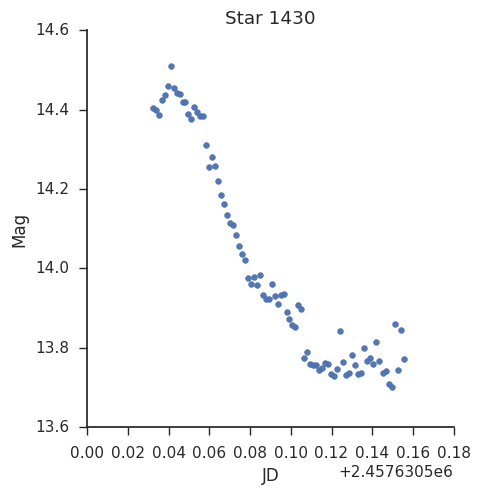

[[ 18.63856748 -44.22175161]]


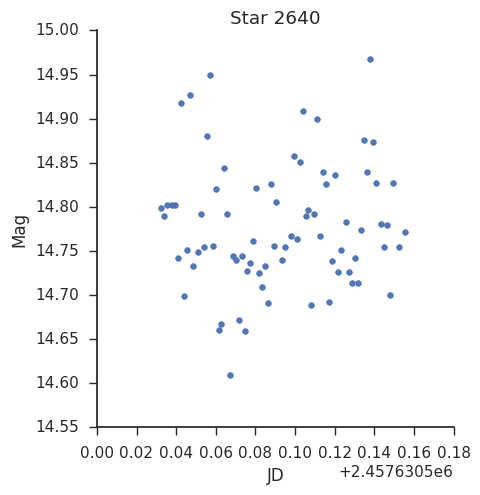

[[ 18.63856748 -44.22175161]]


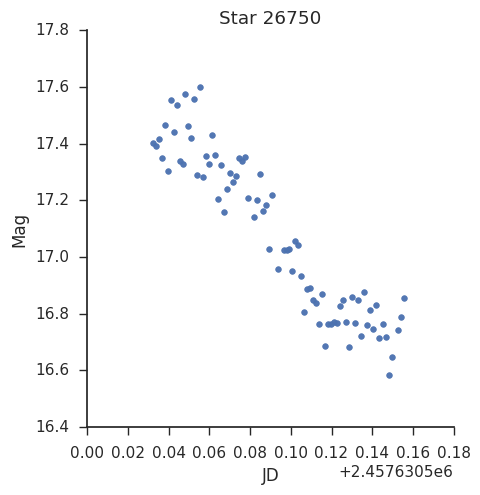

[[ 18.63856748 -44.22175161]]


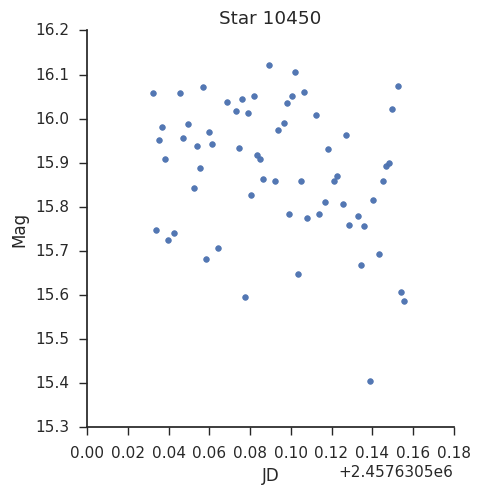

[[ 18.63856748 -44.22175161]]


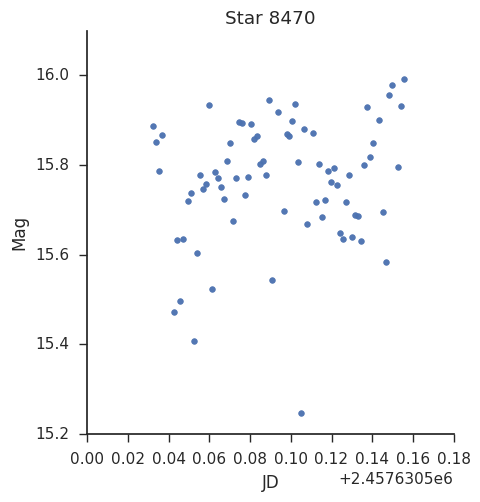

[[ 18.63856748 -44.22175161]]


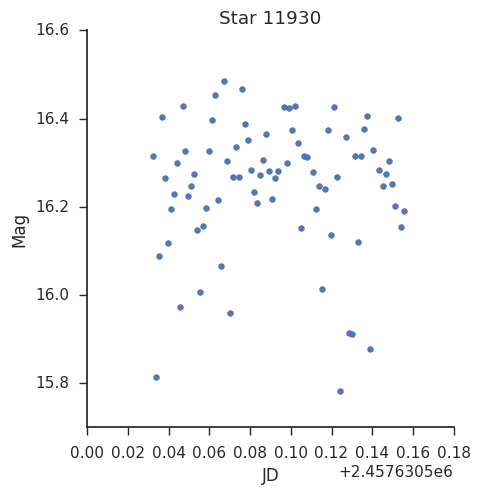

In [33]:
def set_seaborn_style():
    sns.set_context("notebook", font_scale=1.1)
    sns.set_style("ticks")

def read_lightcurve(star):
    df2 = pd.read_csv(lightcurve_dir + str(star) + '.txt', skiprows=[1], sep=' ')
    df2 = df2[df2['V-C'] < 99]
    return df2

def read_pixel_positions(star):
    df2 = pd.read_csv(lightcurve_dir + str(star) + '.txt', skiprows=[1], sep=' ')
    df2 = df2[df2['V-C'] < 99]
    return df2

def get_radec():
    # Some pixel coordinates of interest.
    pixcrd = numpy.array([[0, 0]], numpy.float_)

    # Convert pixel coordinates to world coordinates
    world = w.wcs_pix2world(pixcrd, 1)
    print(world)
    return 0

def plot_lightcurve2(df2, name):
    g = sns.lmplot('JD', 'V', 
               data=df2, 
               fit_reg=False)
    plt.title('Star '+ str(name) + str(get_radec()))
    plt.xlabel('JD')
    plt.ylabel('Mag')    
    sns.plt.show()
    g.savefig(lightcurve_dir+str(star))
    
def plot_lightcurve(df2, name):
    fig = plt.figure(figsize=(20,10))
    ax = fig.add_subplot(111)
    x = df2['JD']
    y = df2['V']
    realx = x
    realy = y
    ax.plot(realx, realy, '.')

    fig.savefig(lightcurve_dir+str(star))
    
set_seaborn_style()
for star in star_list:
    plot_lightcurve2(read_lightcurve(star), star)

In [34]:
from sklearn import preprocessing
df2_f = df2.loc[df['V-C'] < 90] 
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(df2_f['JD'])
fig = plt.figure()
ax = fig.add_subplot(111)
x = x_scaled
y = df2_f['V-C']
ax.plot(x, y, '.')


KeyError: 'V-C'

In [ ]:
print(__doc__)

from sklearn.ensemble import IsolationForest

# fit the model
clf = IsolationForest(max_samples=100, random_state=rng)
clf.fit(X_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(X_outliers)

# plot the line, the samples, and the nearest vectors to the plane
xx, yy = np.meshgrid(np.linspace(-5, 5, 50), np.linspace(-5, 5, 50))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.title("IsolationForest")
plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)

b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c='white')
b2 = plt.scatter(X_test[:, 0], X_test[:, 1], c='green')
c = plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c='red')
plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.legend([b1, b2, c],
           ["training observations",
            "new regular observations", "new abnormal observations"],
           loc="upper left")
plt.show()